# Normality test

In [2]:
# Read the file into a DataFrame: df
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [3]:
# Path to the file to be imported
path = "../Modelab-Python/data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

# Print the head of the DataFrame
print(CO2Data.head())

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7          

## Shapiro-Wilk Test

- If the p-value of the test is greater than α = 0.05, then the data is assumed to be normally distributed.

In [4]:
from scipy.stats import shapiro

ta = CO2Data['ta_micromol_kg']

stat, p = shapiro(ta)
print(f'Estadístico= {stat:.5f}, p-valor= {p:.5f}')
if p > 0.05:
    print("La distribución es normal (no se rechaza H0)")
else:
    print("La distribución NO es normal (se rechaza H0)")

Estadístico= 0.87971, p-valor= 0.00000
La distribución NO es normal (se rechaza H0)


In [5]:
from scipy.stats import shapiro 

#perform Shapiro-Wilk test for normality

TA = CO2Data['ta_micromol_kg']

shapiro_results = shapiro(TA)


print(f'Statistic= {stat:.5f}, p-value= {p:.5f}')

if shapiro_results.pvalue < 0.05:
    print("The data is not normally distributed (reject H₀).")

else:
    print("The data is normally distributed (fail to reject H₀).")


Statistic= 0.87971, p-value= 0.00000
The data is not normally distributed (reject H₀).


In [ ]:
print(shapiro_results)

ShapiroResult(statistic=np.float64(0.8797113785286559), pvalue=np.float64(9.071435657097518e-08))


## Exercise:

- Respond to the following question: When is it appropriate to use the Kolmogorov-Smirnov test instead of the Shapiro-Wilk test?

#### ✅ Use the Kolmogorov-Smirnov test when:

1. You want to compare a sample to a distribution other than normal:

- The K-S test can be used to compare a sample to any continuous distribution (e.g., exponential, uniform, or a custom distribution), not just normal.

- You must specify the parameters of the theoretical distribution beforehand.

2. You are working with large sample sizes:

- The Shapiro-Wilk test tends to be too sensitive with large datasets and may reject normality for minor deviations.

- K-S is less powerful but can be more stable for large *n*

3. You're comparing two empirical distributions:

- The two-sample K-S test compares two datasets to check if they come from the same distribution — this is not something Shapiro-Wilk can do.

🚫 Avoid using K-S for normality testing when:

- You're testing for normality only and have a small or moderate sample — the Shapiro-Wilk test is more powerful and specifically designed for detecting deviations from normality.

- Based on the previous answer, perform the appropriate test to assess normality in the DIC (Dissolved Inorganic Carbon) and Salinity datasets.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

# Extract the columns from the DataFrame
DIC = CO2Data['dic_micromol_kg']
Sal = CO2Data['sal_psu']

In [10]:
# --- Shapiro-Wilk Test for DIC ---
shapiro_dic = shapiro(DIC)
print(f"DIC - Statistic = {shapiro_dic.statistic:.5f}, p-value = {shapiro_dic.pvalue:.5f}")
if shapiro_dic.pvalue < 0.05:
    print("DIC: The data is NOT normally distributed (reject H₀).")
else:
    print("DIC: The data IS normally distributed (fail to reject H₀).")

DIC - Statistic = 0.85997, p-value = 0.00000
DIC: The data is NOT normally distributed (reject H₀).


In [11]:
# --- Shapiro-Wilk Test for Salinity ---
shapiro_sal = shapiro(Sal)
print(f"Salinity - Statistic = {shapiro_sal.statistic:.5f}, p-value = {shapiro_sal.pvalue:.5f}")
if shapiro_sal.pvalue < 0.05:
    print("Salinity: The data is NOT normally distributed (reject H₀).")
else:
    print("Salinity: The data IS normally distributed (fail to reject H₀).")

Salinity - Statistic = 0.88666, p-value = 0.00000
Salinity: The data is NOT normally distributed (reject H₀).


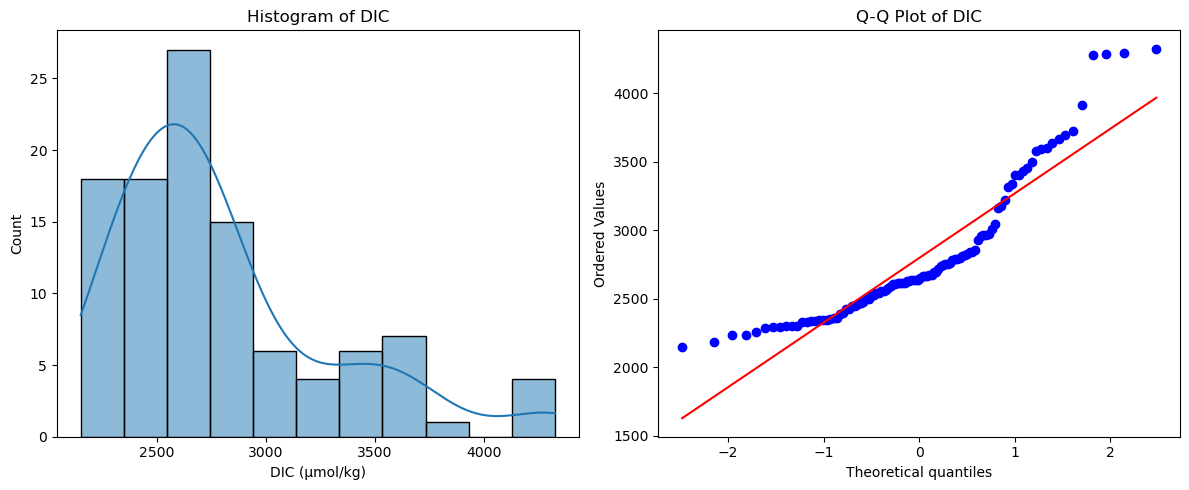

In [12]:
# --- Histogram and Q-Q plot for DIC ---
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(DIC, kde=True)
plt.title("Histogram of DIC")
plt.xlabel("DIC (μmol/kg)")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(DIC, dist="norm", plot=plt)
plt.title("Q-Q Plot of DIC")

plt.tight_layout()
plt.show()

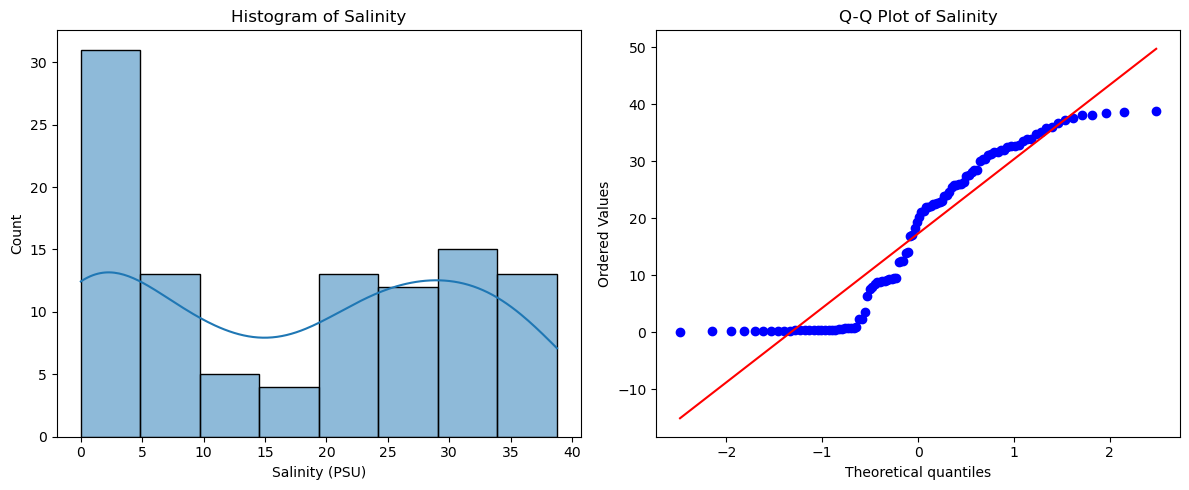

In [13]:
# --- Histogram and Q-Q plot for Salinity ---
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(Sal, kde=True)
plt.title("Histogram of Salinity")
plt.xlabel("Salinity (PSU)")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(Sal, dist="norm", plot=plt)
plt.title("Q-Q Plot of Salinity")

plt.tight_layout()
plt.show()